# Estimation

**Librairies**

In [ ]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

### Estimation

La méthode de **Monte Carlo** permet d’estimer une valeur en répétant des expériences aléatoires.


Estimation de π avec Monte Carlo (100000 points) : 3.14124


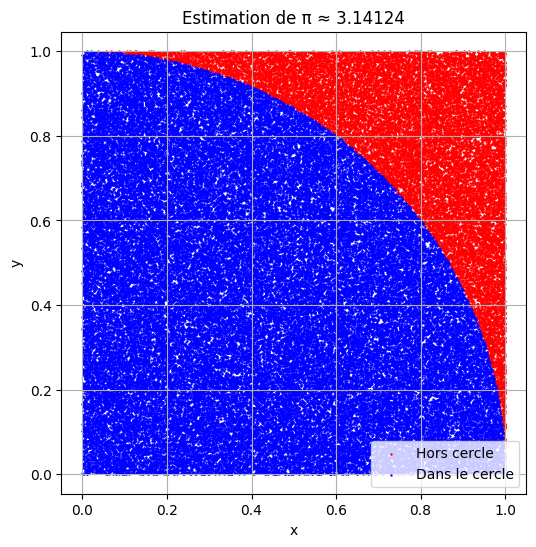

In [ ]:
# Nombre de points simulés
N = 100000
r = 1        # Rayon du cercle (ici, 1)

# Génération de N points aléatoires dans le carré [0, 1] x [0, 1]
x = np.random.rand(N)
y = np.random.rand(N)

# Test : les points à l'intérieur du quart de cercle vérifient x² + y² ≤ r²
inside = x**2 + y**2 <= r**2  # Tableau de booléens (True si le point est dans le quart de cercle)

# Aire du quart de cercle ≈ proportion de points "inside" dans le carré
# Or : Aire = (π * r²) / 4 = π / 4 ⇒  π ≈ 4 × proportion
pi_estimate = 4 * np.sum(inside) / N  # np.sum(inside) compte les True

print(f"Estimation de π avec Monte Carlo ({N} points) : {pi_estimate:.5f}")

plt.figure(figsize=(6, 6))
plt.scatter(x[~inside], y[~inside], color='red', s=0.5, label="Hors cercle")
plt.scatter(x[inside], y[inside], color='blue', s=0.5, label="Dans le cercle")
plt.legend()
plt.title(f"Estimation de π ≈ {pi_estimate:.5f}")
plt.xlabel("x")
plt.ylabel("y")
plt.axis("equal")
plt.grid(True)
plt.show()

Pour une variable aléatoire $X$ ayant une espérance $\mathbb{E}(X)$ et une variance $V(X)$, on peut estimer $\mathbb{E}(X)$ à partir d’un échantillon $(X_1, \dots, X_n)$ de même loi que $X$, via la **moyenne empirique** :

$$
\overline{X}_n = \frac{1}{n} \sum_{k=1}^{n} X_k
$$

Si on reprend notre exemple précédent : Que représente l’espérance ici ?

On fait une **expérience aléatoire** répétée :
on génère des points aléatoires dans un carré, et on teste s’ils tombent **dans le quart de cercle**.

Cela revient à **simuler une variable de Bernoulli** :

$$
X_i =
\begin{cases}
1 & \text{si le point est dans le quart de cercle} \\
0 & \text{sinon}
\end{cases}
$$

Espérance de cette variable :

Cette variable $X_i \sim \text{Bernoulli}(p)$, où :

$$
p = P(\text{point dans le quart de cercle}) = \frac{\pi}{4}
$$

Donc :

$$
\mathbb{E}(X_i) = p = \frac{\pi}{4} \approx 0.7854
$$

Et l'estimateur Monte Carlo utilisé dans le code est :

$$
\hat{p}_N = \frac{1}{N} \sum_{i=1}^{N} X_i = \frac{\text{nb de True dans `inside`}}{N}
$$

Puis, pour remonter à $\pi$, on fait :

$$
\pi \approx 4 \times \hat{p}_N
$$

In [16]:
p_hat = np.sum(inside) / N  # Estimation de l'espérance E(X) = P(point dans le cercle)
pi_estimate = 4 * p_hat     # Estimation de π via Monte Carlo

# Affichage clair
print(f"Estimation de E(X) = P(point dans le quart de cercle) : {p_hat:.5f}")
print(f"Estimation de π = 4 × E(X)                              : {pi_estimate:.5f}")

Estimation de E(X) = P(point dans le quart de cercle) : 0.78531
Estimation de π = 4 × E(X)                              : 3.14124


### Estimer un intervalle de confiance

Deux méthodes sont possibles :

1. **Par l’inégalité de Bienaymé-Tchebychev**

$$
P\left( \left| \overline{X}_n - \mathbb{E}(X) \right| \geq \varepsilon_n \right) \leq \frac{V(X)}{n \varepsilon_n^2}
$$

Pour un niveau de confiance $1 - \alpha$, l’intervalle de confiance est :

$$
\left[ \overline{X}_n - \varepsilon_n,\ \overline{X}_n + \varepsilon_n \right]
\quad \text{avec} \quad
\varepsilon_n = \frac{\sigma(X)}{\sqrt{\alpha n}}
$$

Si $\sigma(X)$ n’est pas connu, on peut utiliser :

* $\sigma_{n-1}(X_1, ..., X_n)$ (estimation biaisée corrigée)
* $\sigma_n(X_1, ..., X_n)$ (estimation classique)

---

2. **Par l’approximation normale**

Grâce au théorème central limite :

$$
\lim_{n \to \infty} P\left( \left| \overline{X}_n - \mathbb{E}(X) \right| \geq \varepsilon_n \right)
= 2\left(1 - \Phi\left( \frac{\sqrt{n}}{\sigma(X)} \varepsilon_n \right) \right)
$$

On obtient alors l’intervalle :

$$
\left[ \overline{X}_n - \varepsilon_n,\ \overline{X}_n + \varepsilon_n \right]
\quad \text{avec} \quad
\varepsilon_n = \frac{\sigma(X)}{\sqrt{n}} \Phi^{-1}\left(1 - \frac{\alpha}{2}\right)
$$


In [17]:
alpha = 0.05
n = 1000
X = np.random.normal(loc=0, scale=2, size=n)  # Ex : loi normale de variance 4

# Estimation de l'espérance
X_bar = np.mean(X)

# Estimation 1 : biaisée corrigée (ddof=1)
eps1 = np.std(X, ddof=1) / np.sqrt(alpha * n)

# Estimation 2 : non corrigée
eps2 = np.std(X) / np.sqrt(alpha * n)

print(f"Intervalle (Tchebychev, estim. 1) : [{X_bar - eps1:.3f}, {X_bar + eps1:.3f}]")
print(f"Intervalle (Tchebychev, estim. 2) : [{X_bar - eps2:.3f}, {X_bar + eps2:.3f}]")


alpha = 0.05
n = 1000
X = np.random.normal(loc=0, scale=2, size=n)

X_bar = np.mean(X)
sigma = np.std(X, ddof=1)
z = norm.ppf(1 - alpha / 2)  # ≈ 1.96 pour alpha = 0.05

eps = sigma / np.sqrt(n) * z

print(f"Intervalle (approx. normale) : [{X_bar - eps:.3f}, {X_bar + eps:.3f}]")


Intervalle (Tchebychev, estim. 1) : [-0.297, 0.251]
Intervalle (Tchebychev, estim. 2) : [-0.297, 0.251]
Intervalle (approx. normale) : [-0.104, 0.151]


### Estimation de probabilité par Monte Carlo (cas Bernoulli)

Si $X$ suit une **loi de Bernoulli** de paramètre inconnu $p$, alors la moyenne empirique :

$$
\overline{X}_n = \frac{1}{n} \sum_{k=1}^{n} X_k
$$

représente la **proportion de succès** sur $n$ répétitions. Elle donne une **estimation de $p$**.


**Estimation de l’écart type**

L’écart type théorique :

$$
\sigma(X) = \sqrt{p(1 - p)}
$$

étant inconnu, on peut le remplacer par :

$$
\sqrt{\overline{X}_n (1 - \overline{X}_n)}
$$


**Intervalle de confiance (asymptotique)**

On applique les méthodes vues (ex. : centrée réduite, approximation normale) pour construire un **intervalle de confiance** pour $p$.

Intervalle avec Bienaymé-Tchebychev

Puisque la variance de la loi de Bernoulli est :

$$
\max_{t \in [0, 1]} t(1 - t) = \frac{1}{4}
$$

on majore l’écart type :

$$
\sigma(X) \leq \frac{1}{2}
$$

et on obtient un intervalle de confiance à niveau $1 - \alpha$ :

$$
\left[ \overline{X}_n - \varepsilon_n,\ \overline{X}_n + \varepsilon_n \right] \quad \text{avec} \quad \varepsilon_n = \frac{1}{2\sqrt{\alpha n}}
$$

**Estimation de $P(A)$**

Événement A : un nombre aléatoire $x∈[0,1]$ est inférieur à 0.3

In [21]:
n = 10_000
alpha = 0.05
z = norm.ppf(1 - alpha / 2)  # ≈ 1.96

# Simulation
X = np.random.rand(n)
success = X < 0.3  # Événement A

# Estimation
p_hat = np.mean(success)

# Intervalle de confiance
margin = z * np.sqrt(p_hat * (1 - p_hat) / n)
ic_lower = p_hat - margin
ic_upper = p_hat + margin

# Affichage
print(f"Estimation de P(A = x < 0.3) ≈ {p_hat:.4f}")
print(f"IC 95% : [{ic_lower:.4f}, {ic_upper:.4f}]")

Estimation de P(A = x < 0.3) ≈ 0.3006
IC 95% : [0.2916, 0.3096]


### Estimation d’une loi discrète $P(X = i)$

Si $X$ prend des valeurs dans $\{0, 1, ..., k\}$, on peut estimer les $p_i = P(X = i)$ par comptage :

In [19]:
k = 5           # X prend les valeurs 0, 1, ..., 5
N = 10_000      # Nombre de tirages
P = np.zeros(k + 1)

# Simulation : tirages uniformes entiers de 0 à k
X = np.random.randint(0, k + 1, size=N)

# Comptage des fréquences
for i in X:
    P[i] += 1

P = P / N  # normalisation pour obtenir des probabilités

print("Estimation des P(X = i) :")
for i, p in enumerate(P):
    print(f"P({i}) ≈ {p:.4f}")


Estimation des P(X = i) :
P(0) ≈ 0.1678
P(1) ≈ 0.1657
P(2) ≈ 0.1659
P(3) ≈ 0.1646
P(4) ≈ 0.1690
P(5) ≈ 0.1670
